**PREDICTING SALARIES OF DATA SCIENTISTS**
* Data scientist is the sexiest job in the world. How many times have you heard that? Analytics India Annual Salary Study which aims to understand a wide range of trends data science says that the median analytics salary in India for the year 2017 is INR 12.7 Lakhs across all experience level and skill sets. So given the job description and other key information can you predict the range of salary of the job posting? What kind of factors influence the salary of a data scientist? The study also says that in the world of analytics, Mumbai is the highest paymaster at almost 13.3 Lakhs per annum, followed by Bengaluru at 12.5 Lakhs. The industry of the data scientist can also influence the salary. Telecom industry pays the highest median salaries to its analytics professionals at 18.6 Lakhs. What are you waiting for, solve the problem by predicting how much a data scientist or analytics professional will be paid by analysing the data given. Bonus Tip: You can analyse the data and get key insights for your career as well. The best data scientists and machine learning engineers will be given awesome prizes at the end of hackathon. Share this hackathon with a colleague who may be interested in mining the dataset for insights and make great predictions. Data The dataset is based on salary and job postings in India across the internet. The train and the test data consists of attributes mentioned below. The rows of train dataset has rich amount of information regarding the job posting such as name of the designation and key skills required for the job. The training data and test data comprise of 19802 samples and of 6601 samples each. This is a dataset which has been collected over some time to gather relevant analytics jobs posting over the years. Features Name of the company (Encoded) Years of experience Job description Job designation Job Type Key skills Location Salary in Rupees Lakhs(To be predicted) Problem Statement Based on the given attributes and salary information, build a robust machine learning model that predicts the salary range of the salary post.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/data-scientist-salary/train.csv
/kaggle/input/data-scientist-salary/sample_submission.xlsx
/kaggle/input/data-scientist-salary/test.csv


In [2]:
# import tensorflow as tf
# p = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(p[0], 'GPU')

# EDA AND FEATURE ENGINEERING

In [3]:
train = pd.read_csv("/kaggle/input/data-scientist-salary/train.csv")
test = pd.read_csv("/kaggle/input/data-scientist-salary/test.csv")

In [4]:
train.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [5]:
train.shape, test.shape

((19802, 9), (6601, 7))

In [6]:
train.nunique()

Unnamed: 0              19802
experience                129
job_description          9059
job_desig               11708
job_type                    5
key_skills              12951
location                 1504
salary                      6
company_name_encoded     5035
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19802 non-null  int64 
 1   experience            19802 non-null  object
 2   job_description       15384 non-null  object
 3   job_desig             19802 non-null  object
 4   job_type              4797 non-null   object
 5   key_skills            19801 non-null  object
 6   location              19802 non-null  object
 7   salary                19802 non-null  object
 8   company_name_encoded  19802 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


Number of nan values in the feature columns

In [8]:
train.isna().sum()

Unnamed: 0                  0
experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [9]:
train = train.dropna(subset = ["key_skills"])
df_train = train[['key_skills', 'job_desig', 'job_description', 'location', 'job_type', 'experience','salary']]
df_test = test[['key_skills', 'job_desig', 'job_description', 'job_type', 'experience', 'location']]

In [10]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6


Cleaning key_skills column(Removing punctuations,stopwords,lowercasing text)

In [11]:
import re

def clean_skills(skl):
    skills = str(skl).lower()
    skills = re.sub('\...','',skills)
    skills = re.sub(',','',skills)
    skills = re.sub(r'\s+', ' ', skills)
    return skills

df_train['skills_cleaned'] = df_train['key_skills'].apply(clean_skills)
df_test['skills_cleaned'] = df_test['key_skills'].apply(clean_skills)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...


Filling nan values and cleaning Job Description column(Removing punctuations,stopwords,lowercasing text,etc)

In [13]:
train.job_description.fillna('missing',inplace = True)
test['job_description'].fillna('missing', inplace=True)

def clean_job_desc(job):
    job_desc = str(job).lower()
    job_desc = re.sub(r'[^a-z]', ' ', job_desc)
    job_desc = re.sub(r'\s+', ' ', job_desc)
    return job_desc

df_train['job_desc_cleaned'] = df_train['job_description'].apply(clean_job_desc)
df_test['job_desc_cleaned'] = df_test['job_description'].apply(clean_job_desc)

In [14]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...


Cleaning locations columns

In [15]:

def clean_location(loc):
    location = loc.lower()
    location = re.sub(r'[^a-z]', ' ', location)
    location = re.sub(r'\s+', ' ', location)
    return location

df_train['loc_cleaned'] = df_train['location'].apply(clean_location)
df_test['loc_cleaned'] = df_test['location'].apply(clean_location)

Transforming the Jobs column with consistent values having same meaning.

In [16]:
train['job_type'].fillna('missingjobtype', inplace=True)
train['job_type'].replace('Analytics', 'analytics', inplace=True)
train['job_type'].replace('Analytic', 'analytics', inplace=True)
train['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
train['job_type'].replace('analytic', 'analytics', inplace=True)

test['job_type'].fillna('missingjobtype', inplace=True)
test['job_type'].replace('Analytics', 'analytics', inplace=True)
test['job_type'].replace('Analytic', 'analytics', inplace=True)
test['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
test['job_type'].replace('analytic', 'analytics', inplace=True)

df_train['job_type_cleaned'] = train['job_type'] 
df_test['job_type_cleaned'] = test['job_type']

In [17]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype


In [18]:
df_train.isna().sum()

key_skills              0
job_desig               0
job_description      4417
location                0
job_type            15005
experience              0
salary                  0
skills_cleaned          0
job_desc_cleaned        0
loc_cleaned             0
job_type_cleaned        0
dtype: int64

In [19]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype


Extracting minimum and maximum experience from the Experience column

In [20]:
def min_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(" ")
    exp = int(exp[0])
    return exp
    
def max_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(' ')
    exp = int(exp[1])
    return exp
    
df_train['min_exp'] = df_train['experience'].apply(lambda x : min_exp(x))
df_train['max_exp'] = df_train['experience'].apply(lambda x : max_exp(x))

df_test['min_exp'] = df_test['experience'].apply(lambda x : min_exp(x))
df_test['max_exp'] = df_test['experience'].apply(lambda x : max_exp(x))
        

In [21]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned,min_exp,max_exp
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype,5,7
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype,10,17
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics,5,9
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics,7,10
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype,1,3


Cleaning Job_description column feature

In [22]:
def clean_job_desig(desig):
    job_desig = desig.lower()
    job_desig = re.sub(r'[^a-z]', ' ', job_desig)
    job_desig = re.sub(r'\s+', ' ', job_desig)
    return job_desig

df_train['desig_cleaned'] = df_train['job_desig'].apply(clean_job_desig)
df_test['desig_cleaned'] = df_test['job_desig'].apply(clean_job_desig)

Making a new aggregate column with clean feature values with text.

In [23]:
df_train['merged'] = (df_train['desig_cleaned'] + ' ' + df_train['job_desc_cleaned'] + ' ' + df_train['skills_cleaned']
                      + ' ' + df_train['job_type_cleaned'])

df_test['merged'] = (df_test['desig_cleaned'] + ' ' + df_test['job_desc_cleaned'] + ' ' + df_test['skills_cleaned']
                     + ' ' + df_test['job_type_cleaned'])

In [24]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned,min_exp,max_exp,desig_cleaned,merged
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype,5,7,senior exploit and vulnerability researcher,senior exploit and vulnerability researcher ex...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype,10,17,head scm,head scm he should have handled a team of atle...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics,5,9,deputy manager talent management leadership de...,deputy manager talent management leadership de...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics,7,10,associate manager data engineering,associate manager data engineering years of o...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype,1,3,ts gsa senior analyst,ts gsa senior analyst chartered accountancy de...


Final Feature Selection to obtain the final dataframe which will be used for modelling.

In [25]:
data_train  = df_train[['merged', 'loc_cleaned', 'min_exp', 'max_exp']] 
data_test = df_test[['merged', 'loc_cleaned', 'min_exp', 'max_exp']] 

In [26]:
data_train.head()

,merged,loc_cleaned,min_exp,max_exp
0,senior exploit and vulnerability researcher ex...,delhi ncr vikas puri,5,7
1,head scm he should have handled a team of atle...,sonepat,10,17
2,deputy manager talent management leadership de...,delhi ncr,5,9
3,associate manager data engineering years of o...,bengaluru,7,10
4,ts gsa senior analyst chartered accountancy de...,gurgaon,1,3


In [27]:
data_test.head()

,merged,loc_cleaned,min_exp,max_exp
0,it technology senior consultant java j ee seve...,bengaluru,7,12
1,medical billing process international kpo insu...,ahmedabad sola,0,5
2,oracle sales cloud functional consultant shoul...,bengaluru,3,6
3,looking for freshers who want to work with us ...,delhi ncr chennai hyderabad gurgaon lucknow mu...,0,3
4,process associate sr process associate tech as...,hyderabad,0,5


In [28]:
data_train = data_train.rename(columns = {'merged':'emp_info'},inplace = False)

In [29]:
data_test = data_test.rename(columns = {'merged':'emp_info'},inplace = False)

In [30]:
def min_sal(sal):
    val = str(sal).split("to")
    return val[0]
def max_sal(sal):
    val = str(sal).split("to")
    return val[1]

target = pd.DataFrame()
target["min_sal"] = df_train["salary"].apply(lambda x: min_sal(x))
target["max_sal"] = df_train["salary"].apply(lambda x: max_sal(x))
target1 = target.min_sal
target2 = target.max_sal

In [31]:
target.head()

,min_sal,max_sal
0,6,10
1,10,15
2,15,25
3,10,15
4,3,6


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



# EDA

In [33]:
def get_ax(rows = 1,cols = 2,size = 7):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return fig,ax

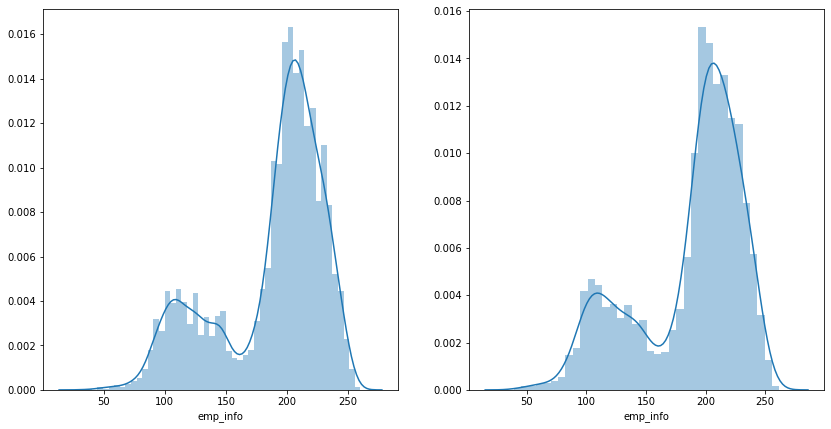

In [34]:
fig,ax = get_ax()
sns.distplot(data_train["emp_info"].str.len(),ax = ax[0])
sns.distplot(data_test["emp_info"].str.len(),ax = ax[1])

In [35]:
data_train.nunique()

emp_info       13687
loc_cleaned     1414
min_exp           22
max_exp           29
dtype: int64

Distribution of the min experience and maximum experience. 

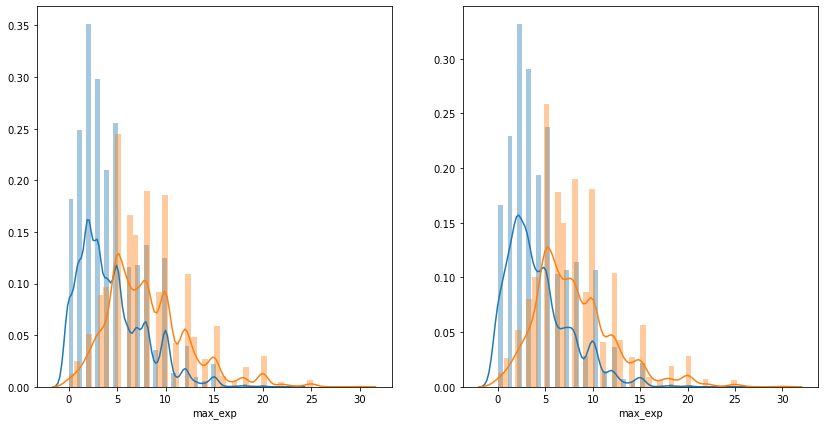

In [36]:
fig,ax = get_ax()

sns.distplot(data_train.min_exp,ax = ax[0])
sns.distplot(data_train.max_exp,ax = ax[0])


sns.distplot(data_test.min_exp,ax = ax[1])
sns.distplot(data_test.max_exp,ax = ax[1])

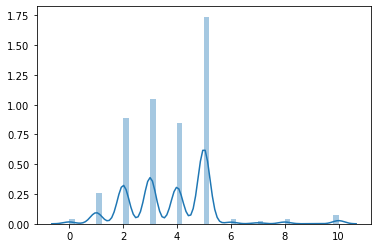

In [37]:
sns.distplot(data_train.max_exp-data_train.min_exp)

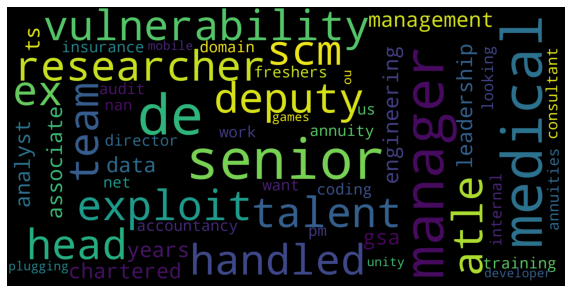

In [38]:

from wordcloud import WordCloud
def wordcloud(data):
    wordcloud = WordCloud(background_color = 'Black',
                         max_words = 50,
                         max_font_size = 40,
                         scale = 5,
                         random_state = 5).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(data_train["emp_info"]) 

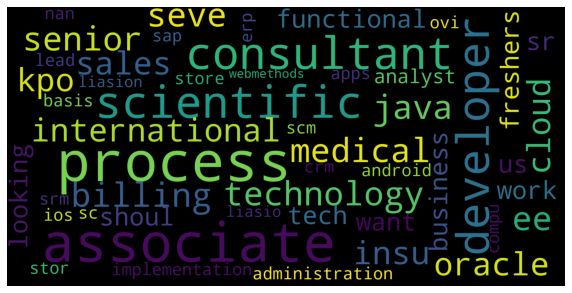

In [39]:
from wordcloud import WordCloud
def wordcloud(data):
    wordcloud = WordCloud(background_color = 'Black',
                         max_words = 50,
                         max_font_size = 40,
                         scale = 5,
                         random_state = 5).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(data_test["emp_info"]) 

In [40]:
data_train.head()

,emp_info,loc_cleaned,min_exp,max_exp
0,senior exploit and vulnerability researcher ex...,delhi ncr vikas puri,5,7
1,head scm he should have handled a team of atle...,sonepat,10,17
2,deputy manager talent management leadership de...,delhi ncr,5,9
3,associate manager data engineering years of o...,bengaluru,7,10
4,ts gsa senior analyst chartered accountancy de...,gurgaon,1,3


# MODELLING

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['salary'] = le.fit_transform(train['salary'])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(
    data_train,train['salary'], test_size=0.20, 
    stratify=train['salary'], random_state=75)

In [43]:
print('No. of sample texts X_train: ', len(X_train))
print('No. of sample texts X_cv   : ', len(X_cv))


No. of sample texts X_train:  15840
No. of sample texts X_cv   :  3961


Creating separate column values to encode them accordingly.

In [44]:
X_train_merged = X_train['emp_info']
X_train_loc = X_train['loc_cleaned']

X_cv_merged = X_cv['emp_info']
X_cv_loc = X_cv['loc_cleaned']

Encoding text column(merged) using TF-IDF vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,3), max_df=0.9)
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}')

X_train_merged = tf1.fit_transform(X_train_merged)
X_train_loc = tf2.fit_transform(X_train_loc)

X_cv_merged = tf1.transform(X_cv_merged)
X_cv_loc = tf2.transform(X_cv_loc)
# X_cv_merged

In this kernel I will be standardizing only the experience columns but please try to standardize all the numerical features and convert them into sparsematrix then stack them horizontally as proceeded further for better results.

In [46]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_MinExp = sc1.fit_transform(np.array(X_train['min_exp']).reshape(-1,1))
X_cv_MinExp = sc1.transform(np.array(X_cv['min_exp']).reshape(-1,1))
X_train_MinExp = sparse.csr_matrix(X_train_MinExp)
X_cv_MinExp = sparse.csr_matrix(X_cv_MinExp)

sc2 = StandardScaler()
X_train_MaxExp = sc2.fit_transform(np.array(X_train['max_exp']).reshape(-1,1))
X_cv_MaxExp = sc2.transform(np.array(X_cv['max_exp']).reshape(-1,1))
X_train_MaxExp = sparse.csr_matrix(X_train_MaxExp)
X_cv_MaxExp = sparse.csr_matrix(X_cv_MaxExp)

In [47]:
from scipy.sparse import hstack, csr_matrix

merged_train = hstack((X_train_merged, X_train_loc, X_train_MinExp, X_train_MaxExp))
merged_cv  = hstack((X_cv_merged, X_cv_loc, X_cv_MinExp, X_cv_MaxExp))

In [48]:
merged_train.shape, merged_cv.shape


((15840, 52320), (3961, 52320))

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [50]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

You can apply any Hyperparamter tuning tech to obtain the optimal parameters but I have chosen according to my past tuning parameters...Do try to model with different set of params.

In [51]:
param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.04,  
         'num_leaves': 23,
         'max_depth': 7, 
         'min_data_in_leaf': 28, 
         'max_bin': 10, 
         'min_data_in_bin': 3,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

In [52]:
lgbm = lgb.train(params=param,
                 train_set=train_data,
                 num_boost_round=100,
                 valid_sets=[test_data])

y_pred_class = lgbm.predict(merged_cv)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.72184
[2]	valid_0's multi_logloss: 1.69929
[3]	valid_0's multi_logloss: 1.67832
[4]	valid_0's multi_logloss: 1.6593
[5]	valid_0's multi_logloss: 1.64141
[6]	valid_0's multi_logloss: 1.6247
[7]	valid_0's multi_logloss: 1.60886
[8]	valid_0's multi_logloss: 1.59421
[9]	valid_0's multi_logloss: 1.58002
[10]	valid_0's multi_logloss: 1.56688
[11]	valid_0's multi_logloss: 1.55428
[12]	valid_0's multi_logloss: 1.54221
[13]	valid_0's multi_logloss: 1.53094
[14]	valid_0's multi_logloss: 1.51994
[15]	valid_0's multi_logloss: 1.50985
[16]	valid_0's multi_logloss: 1.49992
[17]	valid_0's multi_logloss: 1.49045
[18]	valid_0's multi_logloss: 1.48158
[19]	valid_0's multi_logloss: 1.47276
[20]	valid_0's multi_logloss: 1.4645
[21]	valid_0's multi_logloss: 1.45651
[22]	valid_0's multi_logloss: 1.44898
[23]	valid_0's multi_logloss: 1.44183
[24]	valid_0's multi_logloss: 1.43485
[25]	valid_0's multi_logloss: 1.42782
[26]	valid_0's multi_logloss: 1.42127
[27]	valid_0's multi_log

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [53]:
X_train_merged = data_train['emp_info']
X_train_loc = data_train['loc_cleaned']

X_test_merged = data_test['emp_info']
X_test_loc = data_test['loc_cleaned']

y_train = train['salary']

In [54]:
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,3))
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}')

X_train_merged = tf1.fit_transform(X_train_merged)
X_train_loc = tf2.fit_transform(X_train_loc)

X_test_merged = tf1.transform(X_test_merged)
X_test_loc = tf2.transform(X_test_loc)

In [55]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_MinExp = sc1.fit_transform(np.array(df_train['min_exp']).reshape(-1,1))
X_test_MinExp = sc1.transform(np.array(df_test['min_exp']).reshape(-1,1))
X_train_MinExp = sparse.csr_matrix(X_train_MinExp)
X_test_MinExp = sparse.csr_matrix(X_test_MinExp)

sc2 = StandardScaler()
X_train_MaxExp = sc2.fit_transform(np.array(df_train['max_exp']).reshape(-1,1))
X_test_MaxExp = sc2.transform(np.array(df_test['max_exp']).reshape(-1,1))
X_train_MaxExp = sparse.csr_matrix(X_train_MaxExp)
X_test_MaxExp = sparse.csr_matrix(X_test_MaxExp)

In [56]:
merged_train = hstack((X_train_merged, X_train_loc, X_train_MinExp, X_train_MaxExp))
merged_test  = hstack((X_test_merged, X_test_loc, X_test_MinExp, X_test_MaxExp))

In [57]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)

param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.04, 
         'num_leaves': 23,
         'max_depth': 7, 
         'min_data_in_leaf': 28, 
         'max_bin': 10, 
         'min_data_in_bin': 3,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

lgbm = lgb.train(params=param, 
                 train_set=train_data)

predictions = lgbm.predict(merged_test)

y_pred_class = []
for x in predictions:
    y_pred_class.append(np.argmax(x))

y_pred_class = le.inverse_transform(y_pred_class)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [58]:
df_sub = pd.DataFrame(data=y_pred_class, columns=['salary'])


In [59]:
df_sub

,salary
0,10to15
1,0to3
2,6to10
3,0to3
4,0to3
...,...
6596,10to15
6597,6to10
6598,15to25
6599,15to25


In [60]:
df_sub.to_csv("sub.csv",index = False)

In [61]:
def min_sal(sal):
    val = str(sal).split("to")
    return val[0]
def max_sal(sal):
    val = str(sal).split("to")
    return val[1]

minsal = df_sub["salary"].apply(lambda x: min_sal(x))
max_sal = df_sub["salary"].apply(lambda x: max_sal(x))


In [62]:
X = pd.DataFrame({"min_sal":minsal,
                  "max_sal":max_sal})

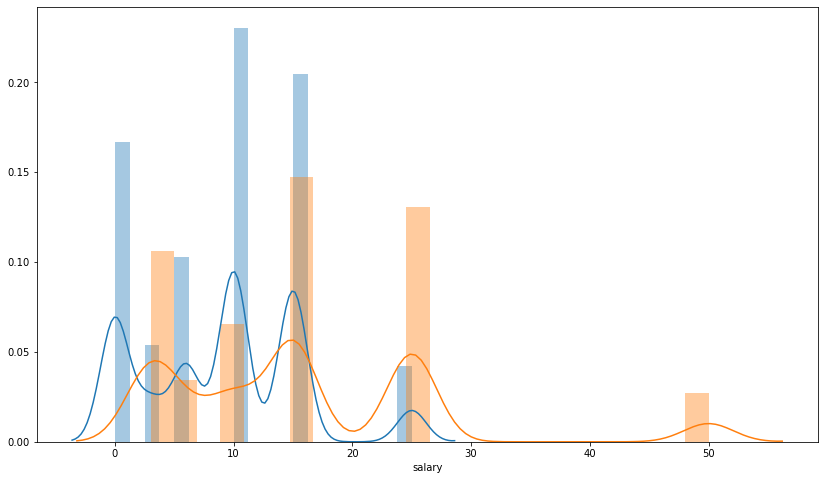

In [63]:
fig,ax = plt.subplots(1,1 ,figsize = (14,8))
sns.distplot(minsal)
sns.distplot(max_sal)

In [64]:
test1 = pd.read_csv("/kaggle/input/data-scientist-salary/test.csv")

In [65]:
final = pd.concat([test1,X],axis=1)

In [66]:
final.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3


In [67]:
def min_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(" ")
    exp = int(exp[0])
    return exp
    
def max_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(' ')
    exp = int(exp[1])
    return exp
    
final['min_exp'] = final['experience'].apply(lambda x : min_exp(x))
final['max_exp'] = final['experience'].apply(lambda x : max_exp(x))

# df_test['min_exp'] = df_test['experience'].apply(lambda x : min_exp(x))
# df_test['max_exp'] = df_test['experience'].apply(lambda x : max_exp(x))
        

In [68]:
final.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal,min_exp,max_exp
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15,7,12
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3,0,5
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10,3,6
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,0,3
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3,0,5


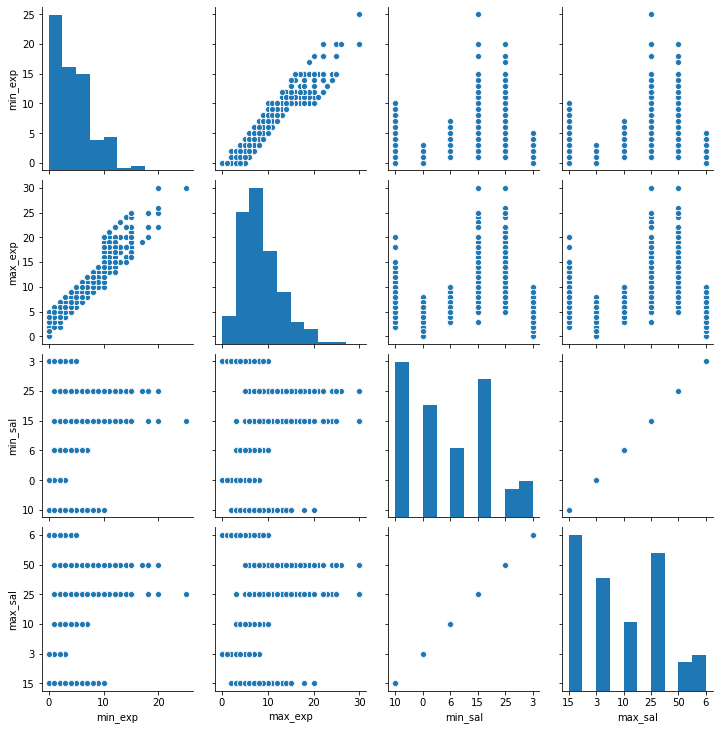

In [69]:
labels = ["min_exp","max_exp","min_sal","max_sal"]
sns.pairplot(final[labels])

In [70]:
# def min_exp(val):
#     exp = re.sub('-',' ',val)
#     exp = exp.split(" ")
#     exp = int(exp[0])
#     return exp
    
# def max_exp(val):
#     exp = re.sub('-',' ',val)
#     exp = exp.split(' ')
#     exp = int(exp[1])
#     return exp
col = final.loc[: , "min_sal":"max_sal"]
final['salary_mean'] = col.mean(axis=1)

cols = final.loc[: , "min_exp":"max_exp"]
final['exp_mean'] = cols.mean(axis=1)


In [71]:
final.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal,min_exp,max_exp,salary_mean,exp_mean
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15,7,12,507.5,9.5
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3,0,5,1.5,2.5
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10,3,6,305.0,4.5
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,0,3,1.5,1.5
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3,0,5,1.5,2.5


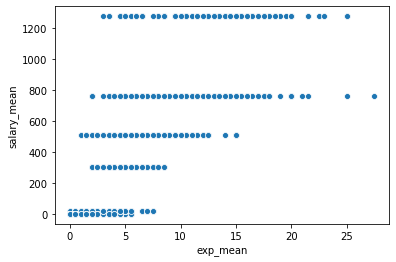

In [72]:
sns.scatterplot(x = final["exp_mean"],y = final["salary_mean"])